In [1]:
#Requirements
import pandas as pd
import cleaning_functions
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
help(cleaning_functions)

Help on module cleaning_functions:

NAME
    cleaning_functions

FUNCTIONS
    change_names(happy, covid)
        ##returns the last name from the name column
    
    total_vaccinations(df)
        ## returns a plot which shows survival rates by pclass
        ## expects the titanic dataframe in pandas format

FILE
    c:\users\santi\code\uofm_2021\data_manipulation\final_project\cleaning_functions.py




## Problem Statement
Our goal is to determine how happiness levels correspond to responses and outcomes of COVID-19. 

## Data

To answer this question, we are using the World Happiness Report from 2020 and the Novel COVID-19 set, both from Kaggle and linked below:

COVID-19: https://www.kaggle.com/abhimaneukj/covid19-dataset

WHR: https://www.kaggle.com/yamaerenay/world-happiness-report-preprocessed?select=2020_report.csv

In [3]:
covid = pd.read_csv("COVID-19 Dataset.csv")
happy = pd.read_csv("2020_report.csv")
print(happy.shape)
print(covid.shape)

(138, 10)
(216, 18)


## Data cleaning and manipulation

To address my central question I did the following data cleaning steps:
1. Collect the names of countries that are in one dataset but not the others
2. Determine manually which country names to change and which to drop
3. Change the names in one data set to fit with the others
4. Calculate the vaccination rate by dividing the total vaccinations by the population
    
This are all contained in the file data_cleaning_functions.py. 

In [4]:
# Clean names to prepare for merging
happy = cleaning_functions.change_names(happy, covid)

Andorra
Angola
Anguilla
Antigua and Barbuda
Aruba
Bahamas
Barbados
Belize
Bermuda
Bhutan
British Virgin Islands
Brunei
Cape Verde
Cayman Islands
Central African Republic
Comoros
Congo
Cook Islands
Cote d'Ivoire
Cuba
Curacao
Czechia
Democratic Republic of Congo
Djibouti
Dominica
Equatorial Guinea
Eritrea
Eswatini
Faeroe Islands
Fiji
French Polynesia
Gambia
Gibraltar
Greenland
Grenada
Guernsey
Guinea-Bissau
Guyana
Hong Kong
Isle of Man
Jersey
Kiribati
Laos
Lesotho
Liechtenstein
Macao
Maldives
Marshall Islands
Micronesia (country)
Monaco
Montserrat
Mozambique
Namibia
New Caledonia
North America
North Macedonia
Oceania
Oman
Palau
Palestine
Papua New Guinea
Qatar
Saint Kitts and Nevis
Saint Lucia
Saint Vincent and the Grenadines
Samoa
San Marino
Sao Tome and Principe
Seychelles
Sint Maarten (Dutch part)
Solomon Islands
Somalia
South Sudan
Sudan
Suriname
Syria
Taiwan
Timor
Tonga
Trinidad and Tobago
Turks and Caicos Islands
Vanuatu
Vatican
Wallis and Futuna


In [5]:
# Create vaccination rate column
covid['vaccination_rate'] = covid.apply(cleaning_functions.total_vaccinations, axis = 1)

In [6]:
# Only include specific columns in the merge
cols = ['Continent', 'Country', 'Total_Deaths_Per_Million', 'Total_Cases_Per_Million', \
        'vaccination_rate', 'Population_Density', 'GDP_Per_Capita', 'Median_Age', \
       'happiness_score', 'social_support', 'government_trust', 'continent', 'Population']
merged_data = happy.merge(covid, how='left', left_on='country', right_on='Country')[cols]
merged_data.head()

,Continent,Country,Total_Deaths_Per_Million,Total_Cases_Per_Million,vaccination_rate,Population_Density,GDP_Per_Capita,Median_Age,happiness_score,social_support,government_trust,continent,Population
0,Europe,Finland,198.257,26547.840,0.653099,18.136,40585.721,42.8,7.8087,1.499526,0.477857,Europe,5548361
1,Europe,Denmark,459.808,63025.798,0.754859,136.520,46682.515,42.3,7.6456,1.503449,0.495260,Europe,5813302
2,Europe,Switzerland,1277.380,97605.942,0.597497,214.243,57410.166,43.1,7.5599,1.472403,0.407946,Europe,8715494
3,Europe,Iceland,96.109,35656.454,0.807345,3.404,46482.958,37.3,7.5045,1.547567,0.144541,Europe,343360
4,Europe,Norway,159.360,35445.875,0.675289,14.462,64800.057,39.7,7.4880,1.495173,0.434101,Europe,5465629


## Analysis

explanation 

## Question 1:
#### Is there a correlation between a country's happiness levels and their COVID-19 response?

In order to answer this question, we visualised the relationship between happiness_score and the vaccination rate of those countries in scatter plot graphs and bar graphs.

In [7]:
merged_data = happy.merge(covid, how='left', left_on='country', right_on='Country')
merged_data

,country,happiness_score,gdp_per_capita,social_support,health,freedom,generosity,government_trust,dystopia_residual,continent,...,Total_Vaccinations,People_Vaccinated,People_Fully_Vaccinated,Population,Population_Density,Median_Age,Aged_65_Older,Aged_70_Older,GDP_Per_Capita,vaccination_rate
0,Finland,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,Europe,...,7786863.0,4163232.0,3623631.0,5548361,18.136,42.8,21.228,13.264,40585.721,0.653099
1,Denmark,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,Europe,...,8804552.0,4462629.0,4388221.0,5813302,136.520,42.3,19.677,12.325,46682.515,0.754859
2,Switzerland,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,Europe,...,10664254.0,5606512.0,5207485.0,8715494,214.243,43.1,18.436,12.644,57410.166,0.597497
3,Iceland,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,Europe,...,558483.0,282036.0,277210.0,343360,3.404,37.3,14.431,9.207,46482.958,0.807345
4,Norway,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,Europe,...,7874383.0,4183502.0,3690881.0,5465629,14.462,39.7,16.821,10.813,64800.057,0.675289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Botswana,3.4789,0.997549,1.085695,0.494102,0.509089,0.033407,0.101786,0.257241,Africa,...,690001.0,444442.0,245559.0,2397240,4.044,25.8,3.941,2.242,15807.374,0.102434
134,Tanzania,3.4762,0.457163,0.872675,0.442678,0.509343,0.271541,0.203881,0.718963,Africa,...,595938.0,NaN,560938.0,61498438,64.699,17.7,3.108,1.874,2683.304,0.009121
135,Rwanda,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445,Africa,...,3888869.0,2192888.0,1695981.0,13276517,494.869,20.3,2.974,1.642,1854.211,0.127743
136,Zimbabwe,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031,Africa,...,5594808.0,3176445.0,2418363.0,15092171,42.729,19.6,2.822,1.882,1899.775,0.160240


In [8]:
def vacc_percent(df):
    return(df['People_Fully_Vaccinated'] / df['Population'])

In [9]:
#creating the vaccination rate column
merged_data['vaccination_percent'] = merged_data.apply(vacc_percent, axis=1)

In [10]:
#dropping missing values
merged_data.dropna(inplace=True)

In [11]:
merged_data["happiness_score"] = merged_data["happiness_score"]/8

In [12]:
from scipy import stats
stats.pearsonr(merged_data["happiness_score"],merged_data['vaccination_percent'])

PearsonRResult(statistic=0.7128662809454145, pvalue=1.7127763833102725e-13)

0.37696204146913614


(0.0, 1.0)

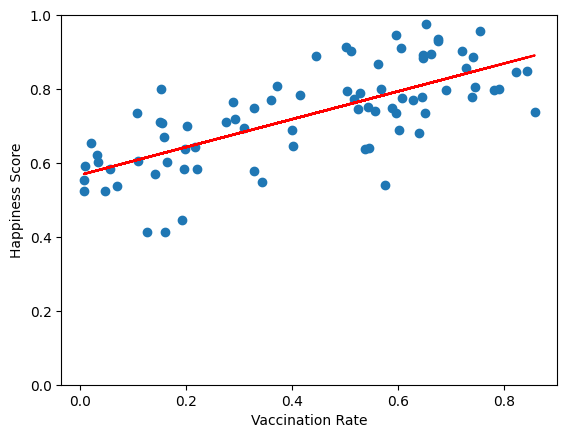

In [13]:
import matplotlib.patches as mpatches

cmap = {1:"#fdc086",0:"#beaed4"}

y = merged_data["happiness_score"]
x = merged_data["vaccination_percent"]
colors = []
labels=[]

#line of best fit
m, b = np.polyfit(x, y, 1)
plt. plot(x, m*x + b, color='red')
print(m)

plt.scatter(x,y)

#axis
plt.ylabel("Happiness Score")
plt.xlabel("Vaccination Rate")

plt.ylim([0,1])

In [14]:
least_trust = merged_data.nsmallest(5,'happiness_score')[['country','vaccination_percent','happiness_score']]
most_trust = merged_data.nlargest(5,'happiness_score')[['country','vaccination_percent', 'happiness_score']]
trust_df = most_trust.merge(least_trust, how='outer', on=['country','vaccination_percent', 'happiness_score'])
#least_trust
trust_df = trust_df.sort_values(by=['happiness_score'])

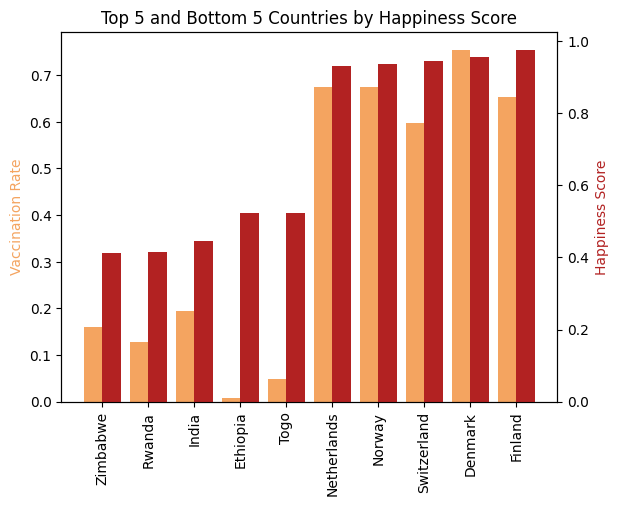

In [15]:
X = trust_df['country']
fig, plt1 = plt.subplots()
vac_rate = trust_df['vaccination_percent']
gov_trust = trust_df['happiness_score']
  
X_axis = np.arange(len(X))
plt.xticks(X_axis, X, rotation = 90)

plt2 = plt.twinx()
plt1.bar(X_axis - 0.2, vac_rate, 0.4, label = 'vaccination_percent', align='center', color='sandybrown')
plt2.bar(X_axis + 0.2, gov_trust, 0.4, label = 'happiness_score', align='center', color='firebrick')

#plt.xlabel("Countries")
plt1.set_ylabel("Vaccination Rate",color='sandybrown')
plt2.set_ylabel('Happiness Score', color='firebrick')
plt.title("Top 5 and Bottom 5 Countries by Happiness Score")
plt.show()

In conclusion, there is a positive correlation between Happiness Score and Vaccination Rate of 0.38

## Question 2:
#### Is there a correlation between a country's government trust levels and their COVID-19 outcomes?

In order to answer this question, we compared the countries' mortality rate/infection rate to their government trust.

In [16]:
# merges the 2 datasets on "country"
full_merged_data = happy.merge(covid, how='left', left_on='country', right_on='Country')

-0.17500140356663615


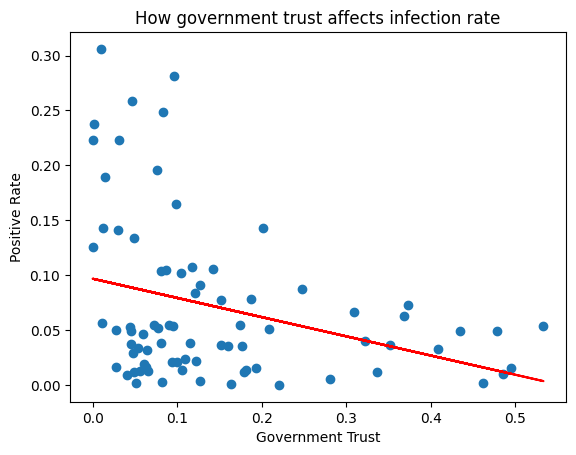

In [17]:
# Positive cases vs. gov't trust
full_merged_data.dropna(inplace=True)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(full_merged_data["government_trust"], full_merged_data['Positive_rate'])

x = full_merged_data['government_trust']
y = full_merged_data['Positive_rate']

# labels
ax.set_xlabel("Government Trust")
ax.set_ylabel("Positive Rate")
ax.set_title("How government trust affects infection rate")

# line of best fit
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color = 'red')
print(m)

Correlation = - 0.17

In [18]:
# Creates new column "mortality_rate"
full_merged_data['mortality_rate'] = full_merged_data['Total_Deaths'] / full_merged_data['Total_Cases']

-0.040103759601097765


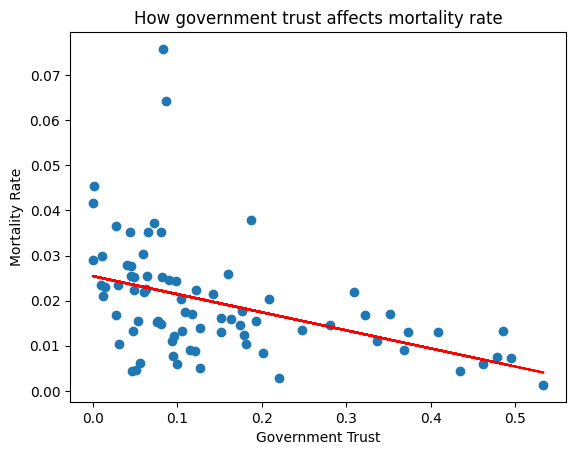

In [19]:
# Mortality rate vs. gov't trust
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(full_merged_data["government_trust"], full_merged_data['mortality_rate'])

x = full_merged_data['government_trust']
y = full_merged_data['mortality_rate']

# labels
ax.set_xlabel("Government Trust")
ax.set_ylabel("Mortality Rate")
ax.set_title("How government trust affects mortality rate")

# line of best fit
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color = 'red')
print(m)

There is a negative correlation between gov't trust vs. infection rate, as well as gov't trust vs. mortality rate (about -0.04)

## Question 3:
#### How does each country's GDP impact the death rates and vaccination rates during COVID-19?

In order to answer this question, we decided to look at the 10 countries with the highest and the 10 countries with the lowest GDP. 

First, we created a dataframe including the country name, GDP, vaccination rate, and deaths per million people organized by GDP low to high. 

In [20]:
gdp_data = merged_data[['Country', 'GDP_Per_Capita', 'vaccination_rate', 'Total_Deaths_Per_Million', \
                'Population_Density', 'Population']]. sort_values(by='GDP_Per_Capita').dropna(subset=\
                ['GDP_Per_Capita', 'vaccination_rate', 'Total_Deaths_Per_Million'])

In [21]:
gdp_data.head()

,Country,GDP_Per_Capita,vaccination_rate,Total_Deaths_Per_Million,Population_Density,Population
122,Togo,1429.813,0.048276,27.836,143.366,8478242
115,Uganda,1697.707,0.008817,67.419,213.759,47123533
123,Ethiopia,1729.927,0.007787,51.121,104.957,117876226
135,Rwanda,1854.211,0.127743,98.520,494.869,13276517
136,Zimbabwe,1899.775,0.160240,307.643,42.729,15092171


In [22]:
min_5_gdp = gdp_data[0:11] 
max_5_gdp = gdp_data[-11:-1]
max_min_gdp = min_5_gdp.merge(max_5_gdp, how='outer')

In [23]:
max_min_gdp.head()

,Country,GDP_Per_Capita,vaccination_rate,Total_Deaths_Per_Million,Population_Density,Population
0,Togo,1429.813,0.048276,27.836,143.366,8478242
1,Uganda,1697.707,0.008817,67.419,213.759,47123533
2,Ethiopia,1729.927,0.007787,51.121,104.957,117876226
3,Rwanda,1854.211,0.127743,98.520,494.869,13276517
4,Zimbabwe,1899.775,0.160240,307.643,42.729,15092171


In [24]:
gdp_countries = max_min_gdp['Country']
gdp_scores = max_min_gdp['GDP_Per_Capita']
gdp_vaccination_rates = max_min_gdp['vaccination_rate']
gdp_death_rates = max_min_gdp['Total_Deaths_Per_Million']
gdp_population_density = max_min_gdp['Population_Density']

The countries with the highest and lowest GDPs were graphed on a bar chart to show the large difference between them. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Togo'),
  Text(1, 0, 'Uganda'),
  Text(2, 0, 'Ethiopia'),
  Text(3, 0, 'Rwanda'),
  Text(4, 0, 'Zimbabwe'),
  Text(5, 0, 'Nepal'),
  Text(6, 0, 'Senegal'),
  Text(7, 0, 'Bangladesh'),
  Text(8, 0, "Cote d'Ivoire"),
  Text(9, 0, 'Pakistan'),
  Text(10, 0, 'Moldova'),
  Text(11, 0, 'Germany'),
  Text(12, 0, 'Austria'),
  Text(13, 0, 'Denmark'),
  Text(14, 0, 'Netherlands'),
  Text(15, 0, 'Saudi Arabia'),
  Text(16, 0, 'United States'),
  Text(17, 0, 'Switzerland'),
  Text(18, 0, 'Norway'),
  Text(19, 0, 'United Arab Emirates'),
  Text(20, 0, 'Ireland')])

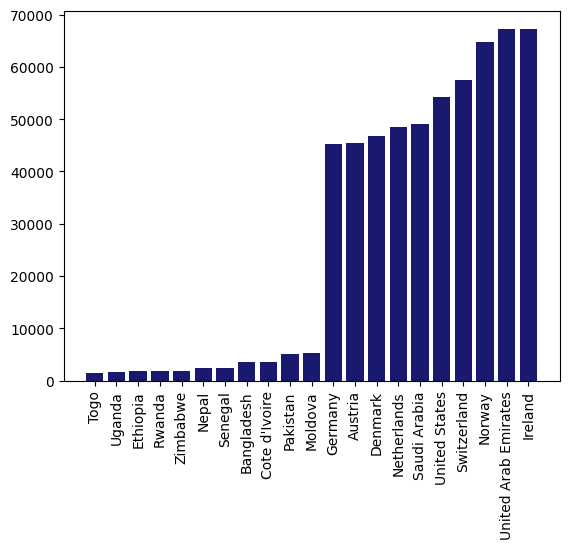

In [25]:
ticks = range(len(gdp_countries))
plt.bar(ticks,gdp_scores, align='center', color='midnightblue')
plt.xticks(ticks, gdp_countries)
plt.xticks(rotation=90)

The vaccination rate of each country was then overlayed on the original GDP bar chart. 

Text(0, 0.5, 'Vaccination Rate')

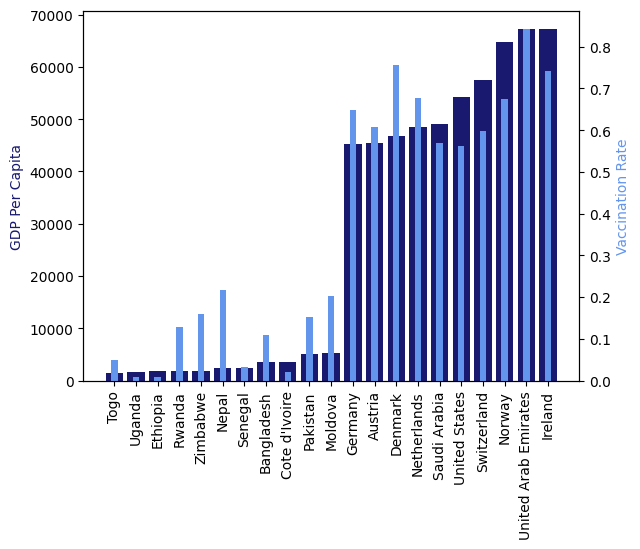

In [26]:
fig, ax1 = plt.subplots()
ticks = range(len(gdp_countries))
plt.xticks(ticks, gdp_countries)
plt.xticks(rotation=90)

ax2 = ax1.twinx()
ax2.bar(ticks, gdp_vaccination_rates, width = 0.3, color = 'cornflowerblue')
ax1.bar(ticks, gdp_scores, width = .8, color = 'midnightblue')


#ax1.set_xlabel('Countries')
ax1.set_ylabel('GDP Per Capita', color='midnightblue')
ax2.set_ylabel('Vaccination Rate', color='cornflowerblue')

In [27]:
print('Lowest GDP vaccination rates: ', \
      max_min_gdp['vaccination_rate'][:9].mean())
print('Highest GDP vaccination rate: ', \
      max_min_gdp['vaccination_rate'][10:].mean())

Lowest GDP vaccination rates:  0.0815654753121051
Highest GDP vaccination rate:  0.625119874674624


There is a clear correlation between the vaccination rate and the GDP of each country. The average vaccination rate in the countries with the 10 highest GDPs is about 62% while the vaccination rate in the countries with the 10 lowest GDPs is about 1%. This is furthered by the chart below of GDP by vaccination rate with a clear positive correlation. 

Text(0, 0.5, 'Vaccination Rate')

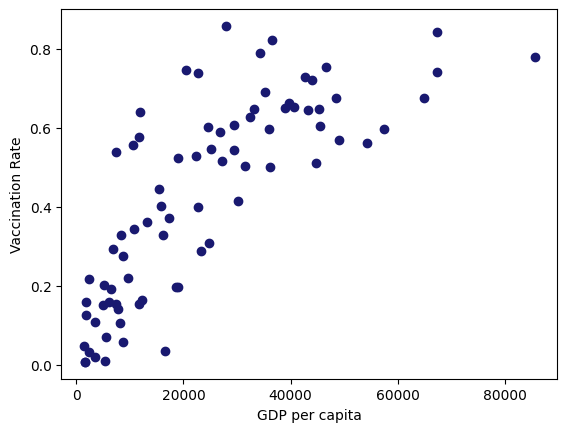

In [28]:
plt.plot(gdp_data['GDP_Per_Capita'], gdp_data['vaccination_rate'], 'o', color = 'midnightblue')
plt.xlabel('GDP per capita')
plt.ylabel('Vaccination Rate')

We then overlayed the COVID-19 death rates over the countries with the top 10 highest and lowest GDP scores. 

Text(0, 0.5, 'Death Rate per million')

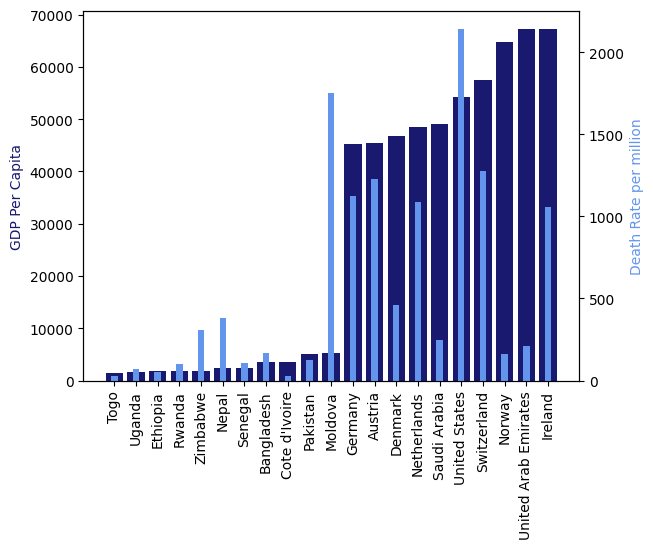

In [29]:
fig, ax1 = plt.subplots()
ticks = range(len(gdp_countries))
plt.xticks(ticks, gdp_countries)
plt.xticks(rotation=90)

ax2 = ax1.twinx()
ax2.bar(ticks, gdp_death_rates, width = 0.3, color = 'cornflowerblue')
ax1.bar(ticks, gdp_scores, width = .8, color = 'midnightblue')

ax1.set_ylabel('GDP Per Capita', color='midnightblue')
ax2.set_ylabel('Death Rate per million', color='cornflowerblue')

Here, there are higher death rates per million in the countries with higher GDPs, however this is likely due to reporting rather than the reality of the situation. In order to look into this theory further, we first plotted the GDP per capita by the Death per Million for every country in order to see if there was an overarching trend. 

Text(0, 0.5, 'Death Rate per Million')

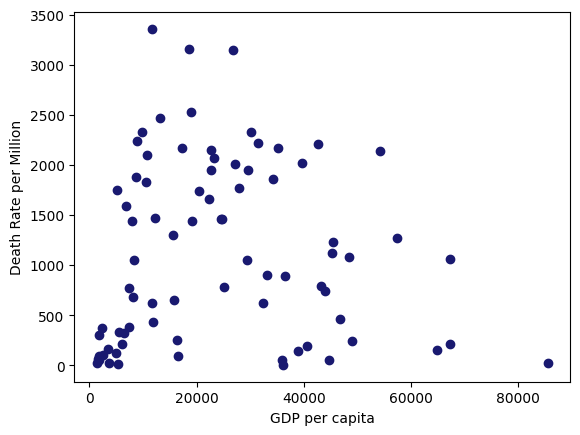

In [30]:
plt.plot(gdp_data['GDP_Per_Capita'], gdp_data['Total_Deaths_Per_Million'], 'o', color = 'midnightblue')
plt.xlabel('GDP per capita')
plt.ylabel('Death Rate per Million')

This revealed that there was no correlation between GDP and deaths per million. In countries where the death rate is higher, we would expect to see a correlation with population density. Here we explore their correlation. 

In [31]:
death_rate_data = gdp_data.sort_values(by = 'Total_Deaths_Per_Million')

In [32]:
max_5_death = death_rate_data[0:10] 
min_5_death = death_rate_data[-11:-1]
max_min_death = max_5_death.merge(min_5_death, how='outer')
max_min_death.head()

,Country,GDP_Per_Capita,vaccination_rate,Total_Deaths_Per_Million,Population_Density,Population
0,New Zealand,36085.843,0.501806,5.761,18.206,4860642
1,Nigeria,5338.454,0.010247,13.037,209.588,211400704
2,Cote d'Ivoire,3601.006,0.021033,24.729,76.399,27053629
3,Togo,1429.813,0.048276,27.836,143.366,8478242
4,Singapore,85535.383,0.781044,29.169,7915.731,5896684


Text(0, 0.5, 'Population Density')

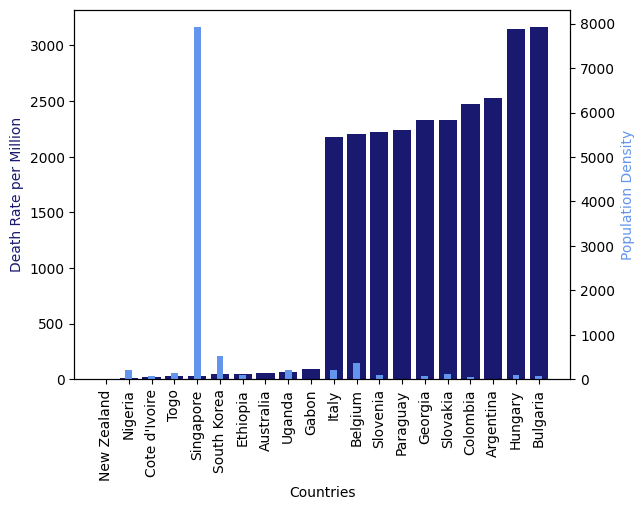

In [33]:
fig, ax1 = plt.subplots()
ticks = range(len(max_min_death['Country']))
plt.xticks(ticks, max_min_death['Country'])
plt.xticks(rotation=90)

ax2 = ax1.twinx()
ax2.bar(ticks, max_min_death['Population_Density'], width = 0.3, color = 'cornflowerblue')
ax1.bar(ticks, max_min_death['Total_Deaths_Per_Million'], width = .8, color = 'midnightblue')


ax1.set_xlabel('Countries')
ax1.set_ylabel('Death Rate per Million', color='midnightblue')
ax2.set_ylabel('Population Density', color='cornflowerblue')

In [34]:
print('Lowest death rates average population density: ', \
      max_min_death['Population_Density'][:9].mean())
print('Highest death rates average population density: ', \
      max_min_death['Population_Density'][10:].mean())

Lowest death rates average population density:  1023.686111111111
Highest death rates average population density:  111.29690000000002


There does not appear to be a correlation between population density and death rate which furthers the idea that the death rate may not be entirely accurate. Nonetheless, these results find no correlation between GDP and death rates per million. 

## Take-aways
1) We found that the overall trust a country has in their government positively correlates with the COVID-19 vaccination rate of said country, with a few outliers such as Rwanda.

2) We also found that there is an overall negative correlation of about -0.04 and -0.17 between government trust vs. mortality rate & infection rate respectivelly. The most the people in a country trusted their government, the better the pandemic numbers were for said country.

3) Finally, we found that there is a correlation between a country's GDP and their vaccination rates, however we found no correlation between a country's GDP and its COVID-19 deaths per million people. 

## References 

Include all references to sources for the code, sources for any packages or methods you used and a guide to all of the files you wrote and are including. 

1) COVID-19 Dataset | Kaggle = https://www.kaggle.com/abhimaneukj/covid19-dataset

2) World Happiness Report | Kaggle = https://www.kaggle.com/yamaerenay/world-happiness-report-preprocessed?select=2020_report.csv
